# Exercise 02 : Bar

In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

## When do our users usually commit the labs: in the night, morning, afternoon, or evening? And how has it changed over time?

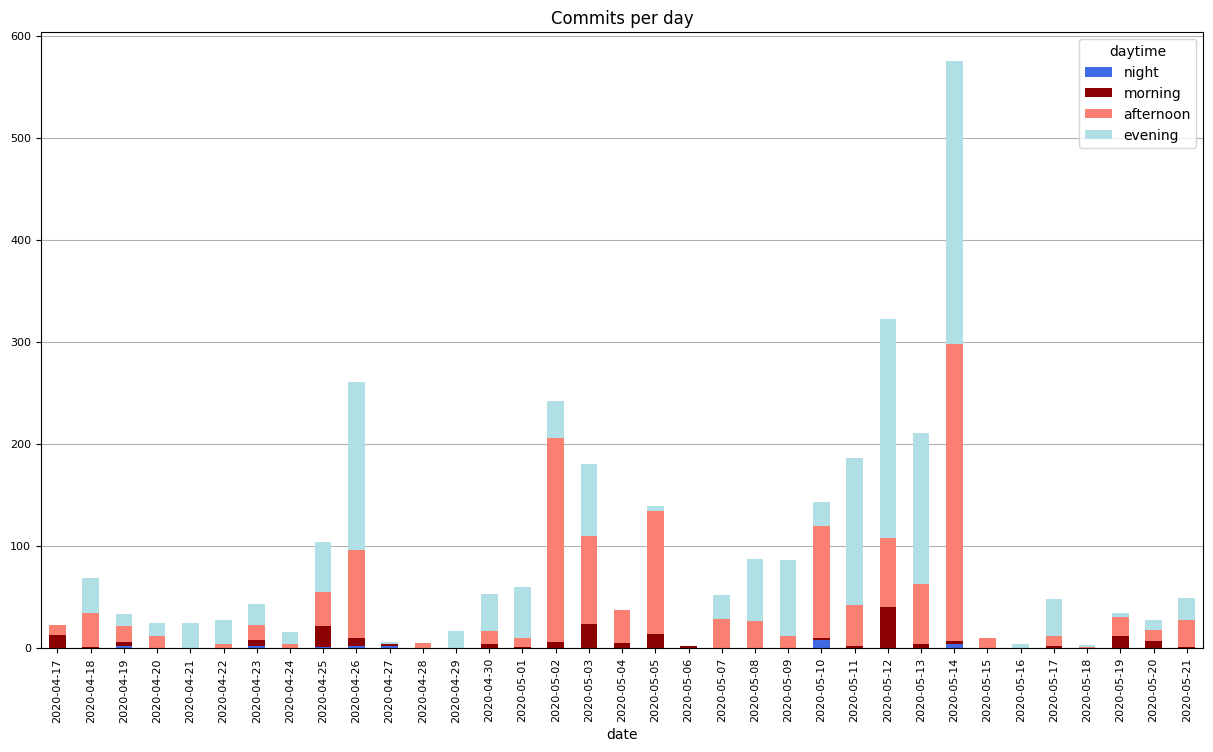

In [3]:
query = """
SELECT timestamp
FROM checker
WHERE uid LIKE 'user_%'
"""
df = pd.read_sql(query, conn)
df['date'] = pd.to_datetime(df['timestamp'])
df['daytime'] = pd.cut(df['date'].dt.hour,
                           bins=[0, 4, 10, 17, 24],
                           labels=['night', 'morning', 'afternoon', 'evening'],
                           right=False)

grouped = df.groupby([df['date'].dt.date, 'daytime']).size().unstack().fillna(0)
colors = ['royalblue', 'darkred', 'salmon', 'powderblue']

ax = grouped.plot.bar(stacked=True, figsize=(15, 8), title='Commits per day', fontsize=8, color=colors, rot=90)
ax.grid(axis='y')
ax.set_axisbelow(True) 

In [4]:
conn.close()

## When do our users usually commit the labs: in the night, morning, afternoon, or evening?

In [5]:
df['daytime'].value_counts().head(2).index.tolist()

['evening', 'afternoon']

## Which day has:

- the most number of commits
- and at the same time, the number of commits in the evening is higher than in the afternoon?

In [6]:
print(df['date'].dt.date.value_counts().idxmax())

2020-05-14
